In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
import os, sys
from glob import glob

In [4]:
import psutil
import os
import time
import sys
import math
from contextlib import contextmanager

@contextmanager
def trace(title):
    t0 = time.time()
    p = psutil.Process(os.getpid())
    m0 = p.memory_info()[0] / 2. ** 30
    yield
    m1 = p.memory_info()[0] / 2. ** 30
    delta = m1 - m0
    sign = '+' if delta >= 0 else '-'
    delta = math.fabs(delta)
    print(f"[{m1:.1f}GB({sign}{delta:.1f}GB):{time.time() - t0:.1f}sec] {title} ", file=sys.stderr)

In [5]:
with trace('load data'):
    df_train = pd.read_csv('../data/train_batch1.csv', index_col=0)
    df_test = pd.read_csv('../data/test_batch1.csv', index_col=0)

[9.6GB(+9.5GB):140.4sec] load data 


In [6]:
df_train.head(2)

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,Zfy1,Znrf4,n-R5s164,n-R5s167,n-R5s197,n-R5s207,n-R5s48,n-R5s56,n-R5s86,n-R5s93
GCCTGTCAACTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AACGCTGTTTGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head(2)

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,Zfy1,Znrf4,n-R5s164,n-R5s167,n-R5s197,n-R5s207,n-R5s48,n-R5s56,n-R5s86,n-R5s93
TAAAGTCGTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATAACTGATGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data = df_train.drop('ct', axis=1)
test_data = df_test.drop('ct', axis=1)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5244 entries, GCCTGTCAACTA to GACTAAAAGTGT
Columns: 31067 entries, 0610007P14Rik to n-R5s93
dtypes: int64(31067)
memory usage: 1.2+ GB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14915 entries, TAAAGTCGTGAT to GAGATGCCCGTN
Columns: 31067 entries, 0610007P14Rik to n-R5s93
dtypes: int64(31067)
memory usage: 3.5+ GB


In [11]:
with trace('umap'):
    pca = PCA(n_components=2, random_state=42)
    pca.fit(train_data)

[14.3GB(+0.0GB):3.2sec] umap 


In [13]:
train_embedding = pca.transform(train_data)

In [14]:
test_embedding = pca.transform(test_data)

In [17]:
train_embedding.shape

(5244, 2)

In [15]:
def plot_scatter(emb1, emb2):
    plt.figure()
    plt.scatter(emb1, emb2)
    plt.show()

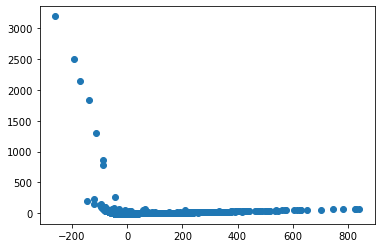

In [18]:
plot_scatter(train_embedding[:, 0], train_embedding[:, 1])

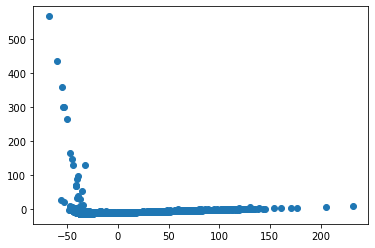

In [19]:
plot_scatter(test_embedding[:, 0], test_embedding[:, 1])